# Titanic Classification Competition

  First i want to thanks Ken Jee (https://www.youtube.com/watch?v=8igH8qZafpo&t=172s) for recommending this kaggle competition for my beginning  in Data Science learning.
  
"On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. (32.5% survived)

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)."


 I will try to follow the workflow steps recommended by Manavh Sehgal, as it is in explained here https://www.kaggle.com/startupsci/titanic-data-science-solutions

## Worflow steps :

- Classifying
- Correlating
- Completing
- Correcting
- Charting

## Importing Librarys

In [1]:
#data anaylsis and wrangling
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
import sklearn as sk

In [11]:
#Reading data
train = pd.read_csv(r'C:\Users\Nathan\Documents\Kaggle\Titanic Classification Competition\train.csv')
test = pd.read_csv(r'C:\Users\Nathan\Documents\Kaggle\Titanic Classification Competition\test.csv')
combine = [train, test]

## Describing features :
- PassengerId: PassengerId
- Survived: 1 = Survived, 2 = Did not Survived
- Pclass: Ticket class:  1 = 1st, 2 = 2nd, 3 = 3rd
- Sex: Gender
- Age: Age in years
- SibSp: number of siblings/spouses aboard the ship
- Parch: number of parents/children aboard the ship
- Ticket: ticket number
- Fare: Passenger Fare
- Cabin: Cabin Number
- Embarked: Port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
train.shape

(891, 12)

## Classifying
### Which features are categorical and numerical?
Categorical Features : Survived, Pclass, Sex, Embarked

Numerical Features : Age, SibSp, Parch, Fare

Mixed features : Ticket and Cabin

### Which features contain typos ?
Name

### Which features contain blank/null/missing values ?
Cabin and Age as we can examine from head and tail, but lets take a good look on it

In [5]:
missing_train = train.isnull().sum() ## sum null values from each column
missing_train = missing_train[missing_train>0] ## get only the ones that have null values
missing_train.sort_values(ascending=False,inplace=True) ## sort by highest null values 
missing_train

Cabin       687
Age         177
Embarked      2
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the distribution of numerical feature values across the samples?

- the train df represents 40% of the total passengers , wich  38% survived counter to 32% of the real total
- 1st class is < 25% of the sample, 2nd and 3rd class being the majority > 75% 
- < 75% are younger than 40
- more than half of the passengers were not with siblings or spouse
- more than 75% were not with parents or childrens
- fare mean is 32, but the max fare paid was 512

In [27]:
train.describe(include=['O']) ## including only categorical features

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carr, Miss. Helen ""Ellen""",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### What is the distribution of objects feature values across the samples?
- Name: No missing data, all unique
- Sex: No missing data, most males (65% males 35% females)
- Ticket: Shouldn't all ticket values be unique ? that's very strange only  76% are
- Cabin: majority are unique, a lot of missing data (probably a MNAR case)
- Embarked: 2 missing data (probably MAR or MCAR), with a majority of S = Southampton 75%

### Correlation
 avaliate early what are the features which are most correlated with the surviving of the passengers
### Completing
 we will have to complete some missing data like, cabin,age and embark
### Correcting
 elimante some variables that will not affect the analysis of surviving prediction, like Name,Ticket and Id. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
### Creating 
 We may create a feature to check family interference, mixing Sibling/Spouse and Parente/Children, create a feature for Title from name feature, and add Age Bands and Fare Bands creating a categorical feature  out of Age and Fare


## Correlation check
 Let's check some correlations assumptions like, women, higher classes and children been more likely to survived

In [26]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [25]:
train[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [24]:
train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [14]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Creating
Maybe will be useful to use the titles as an feature

In [41]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [42]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


In [43]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


Coding Categorical to Ordinal Features

In [44]:
title_map = {'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Other':5} # MAPPING

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)
    

Creating Has_Cabin Feature

In [45]:
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

Dropping unecessary features

In [46]:
train = train.drop(['Name','PassengerId','Ticket','Cabin'],axis = 1)
test = test.drop(['Name','Ticket','Cabin'], axis = 1)

combine = [train,test]
train.shape, test.shape                                        

((891, 10), (418, 10))

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        714 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   889 non-null    object 
 8   Title      891 non-null    int64  
 9   Has_Cabin  891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


mapping some other features

In [48]:
sex_map = {'male':1,'female':2}
embarked_map = {'S':1,'C':2,'Q':3}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_map)
    dataset['Sex'] = dataset['Sex'].fillna(0)
    dataset['Embarked'] = dataset['Embarked'].map(embarked_map)
    dataset['Embarked'] = dataset['Embarked'].fillna(0)

In [49]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,0,3,1,22.0,1,0,7.2500,1.0,1,0
1,1,1,2,38.0,1,0,71.2833,2.0,2,1
2,1,3,2,26.0,0,0,7.9250,1.0,3,0
3,1,1,2,35.0,1,0,53.1000,1.0,2,1
4,0,3,1,35.0,0,0,8.0500,1.0,1,0


### Completing a numerical continuous feature

 We have to fill the NaN values of Age feature, there is certain ways we can do that 
 
 1. generate a random mean +/- standard deviation number
 2. combine others features to find a possibile and more fit value to the NaN, like using ML to fill NaN values on features by using other features.
 
Lets use method 2 ! 
 using Pclass and Sex
 
 

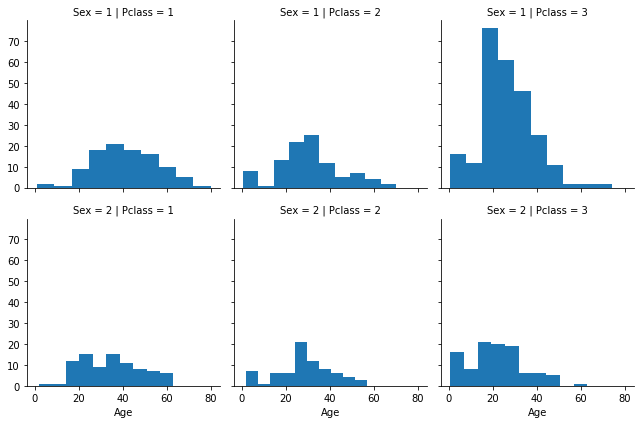

In [50]:
grid = sns.FacetGrid(train,col='Pclass',row='Sex')
grid = grid.map(plt.hist,'Age')

In [51]:
guess_ages = np.zeros((2,3))
medians = np.zeros((2,3))


In [52]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset['Sex'] == i+1) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            medians[i,j] = guess.median()
            

medians

array([[42., 28., 24.],
       [41., 24., 22.]])

 Note to self : pandas.median returns the median of the values of the REQUESTED AXIS, so this will automatically get the median for each Pclass/SibSp combination

In [53]:
medians = medians.astype(int)
medians

array([[42, 28, 24],
       [41, 24, 22]])

In [54]:
for i in range (0,2):
    for j in range (0,3):
        dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i+1) & (dataset.Pclass==j+1),'Age'] = medians[i,j]
        
dataset.head(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,892,3,1,34.5,0,0,7.8292,3,1,0
1,893,3,2,47.0,1,0,7.0000,1,2,0
2,894,2,1,62.0,0,0,9.6875,3,1,0
3,895,3,1,27.0,0,0,8.6625,1,1,0
4,896,3,2,22.0,1,1,12.2875,1,2,0
5,897,3,1,14.0,0,0,9.2250,1,1,0
6,898,3,2,30.0,0,0,7.6292,3,3,0
7,899,2,1,26.0,1,1,29.0000,1,1,0
8,900,3,2,18.0,0,0,7.2292,2,2,0
9,901,3,1,21.0,2,0,24.1500,1,1,0


In [55]:
dataset['Age'] = dataset['Age'].astype(int)

In [56]:
for i in range(0,2):
    for j in range(0,3):
        train.loc[(train.Age.isnull())&(train.Sex==i+1) & (train.Pclass==j+1),'Age'] = medians[i,j]
        
train['Age'] = train['Age'].astype(int)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,0,3,1,22,1,0,7.2500,1.0,1,0
1,1,1,2,38,1,0,71.2833,2.0,2,1
2,1,3,2,26,0,0,7.9250,1.0,3,0
3,1,1,2,35,1,0,53.1000,1.0,2,1
4,0,3,1,35,0,0,8.0500,1.0,1,0
5,0,3,1,24,0,0,8.4583,3.0,1,0
6,0,1,1,54,0,0,51.8625,1.0,1,1
7,0,3,1,2,3,1,21.0750,1.0,4,0
8,1,3,2,27,0,2,11.1333,1.0,2,0
9,1,2,2,14,1,0,30.0708,2.0,2,0


Turning 'Age' feature into a categorical by separating them into Age bands

In [57]:
train['AgeBand'] = pd.cut(train['Age'],5)
train[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


I was expecting that the higher you AgeBand, the lowest would be the survival rate, but, funny thing though is that the third and fourth AgeBand had higher survival rate then the second.But i don't think that's because it's directly connected with the age, maybe the majority of the second ageband is also the majority of 3 Pclass passengers or something like that? let's check

In [33]:
train[['AgeBand','Pclass']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Pclass
0,"(-0.08, 16.0]",2.610000
1,"(16.0, 32.0]",2.565657
2,"(32.0, 48.0]",1.865741
3,"(48.0, 64.0]",1.507246
4,"(64.0, 80.0]",1.727273


, let me see if the gender means of the ageband to confirm this

In [34]:
train[['AgeBand','Sex']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Sex
0,"(-0.08, 16.0]",1.490000
1,"(16.0, 32.0]",1.333333
2,"(32.0, 48.0]",1.351852
3,"(48.0, 64.0]",1.347826
4,"(64.0, 80.0]",1.000000


Nah, not related... well, let's make the Age feature ordinal according to ageband

In [35]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16,'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <=48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <=64),'Age'] = 3
    dataset.loc[dataset['Age'] > 64,'Age'] = 4

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,AgeBand
0,0,3,1,1,1,0,7.2500,1.0,1,0,"(16.0, 32.0]"
1,1,1,2,2,1,0,71.2833,2.0,2,1,"(32.0, 48.0]"
2,1,3,2,1,0,0,7.9250,1.0,3,0,"(16.0, 32.0]"
3,1,1,2,2,1,0,53.1000,1.0,2,1,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,1.0,1,0,"(32.0, 48.0]"


In [37]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
    
train[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean().sort_values(by='FamilySize',ascending=True)

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [38]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.346575
1,1,0.552795


I would drop only Parch and SibSp at first because of FamilySize feature, but FamilySize feature may not be very conclusive either, altough isalone is in our favour, so i will drop familysize too and keep IsAlone

In [39]:
train= train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

In [40]:
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Has_Cabin,AgeBand,IsAlone
0,0,3,1,1,7.2500,1.0,1,0,"(16.0, 32.0]",1
1,1,1,2,2,71.2833,2.0,2,1,"(32.0, 48.0]",1
2,1,3,2,1,7.9250,1.0,3,0,"(16.0, 32.0]",0
3,1,1,2,2,53.1000,1.0,2,1,"(32.0, 48.0]",1
4,0,3,1,2,8.0500,1.0,1,0,"(32.0, 48.0]",0


In [41]:
for dataset in combine:
    dataset['FareBand'] = pd.qcut(dataset['Fare'],4)
    
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Has_Cabin,AgeBand,IsAlone,FareBand
0,0,3,1,1,7.2500,1.0,1,0,"(16.0, 32.0]",1,"(-0.001, 7.91]"
1,1,1,2,2,71.2833,2.0,2,1,"(32.0, 48.0]",1,"(31.0, 512.329]"
2,1,3,2,1,7.9250,1.0,3,0,"(16.0, 32.0]",0,"(7.91, 14.454]"
3,1,1,2,2,53.1000,1.0,2,1,"(32.0, 48.0]",1,"(31.0, 512.329]"
4,0,3,1,2,8.0500,1.0,1,0,"(32.0, 48.0]",0,"(7.91, 14.454]"


In [42]:
train['FareBand'].unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [43]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0),'Fare'] = 2
    dataset.loc[dataset['Fare']>31.0,'Fare'] = 3

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Has_Cabin,AgeBand,IsAlone,FareBand
0,0,3,1,1,0.0,1.0,1,0,"(16.0, 32.0]",1,"(-0.001, 7.91]"
1,1,1,2,2,3.0,2.0,2,1,"(32.0, 48.0]",1,"(31.0, 512.329]"
2,1,3,2,1,1.0,1.0,3,0,"(16.0, 32.0]",0,"(7.91, 14.454]"
3,1,1,2,2,3.0,1.0,2,1,"(32.0, 48.0]",1,"(31.0, 512.329]"
4,0,3,1,2,1.0,1.0,1,0,"(32.0, 48.0]",0,"(7.91, 14.454]"


every feature already regulerized i guess isn't it ?

## Visualize Data

#### Pearson correlation heatmap

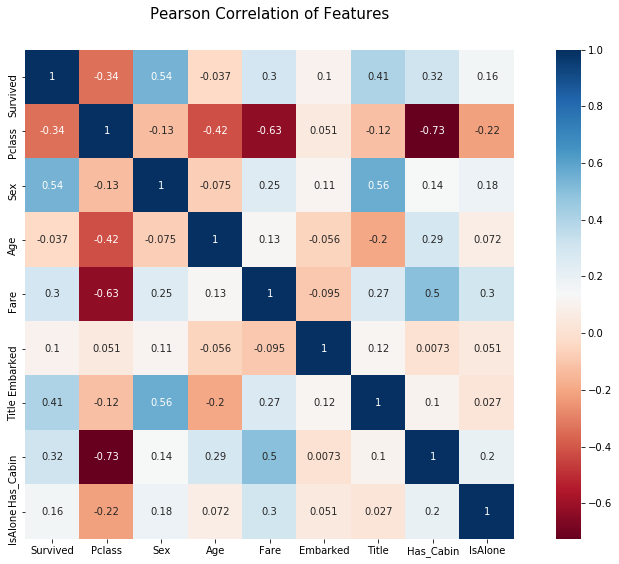

In [44]:
corr = train.corr()
plt.figure(figsize=(15,9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr,square=True,annot=True,cmap=plt.cm.RdBu)

In [45]:
corr_abs = np.abs(corr)
correlated = corr_abs['Survived'].sort_values(ascending=False).to_frame()
correlated = correlated.drop('Survived')
correlated

,Survived
Sex,0.543351
Title,0.405921
Pclass,0.338481
Has_Cabin,0.316912
Fare,0.295875
IsAlone,0.163157
Embarked,0.101849
Age,0.037059


Gender is the most correlated to survived, and Title is the second one, but  Title is kind of related to Gender too, so that is maybe redundant ? don't know if .5 of correlation is enough to consider redundant, i find the title may be useful to us

## ENSEMBLE AND MODELLING

In [46]:
X_train = train.drop(['Survived','AgeBand'],axis=1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId'],axis=1)

In [47]:
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

Remembering that the 'test' dataframe is not actualy the test data that we will do the cross validation, but the one we will submit our prediction for kaggle.com,
so in order to do the cross-validation test , we will have to split our train dataset

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.model_selection import (train_test_split,KFold,StratifiedKFold)

def get_score(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)



In [55]:
kf = KFold(n_splits=5)
skf = StratifiedKFold(n_splits=5)
kf,skf

(KFold(n_splits=5, random_state=None, shuffle=False),
 StratifiedKFold(n_splits=5, random_state=None, shuffle=False))

I will use lowercase for the splited datasets from the original train.csv

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.3)


In [18]:
import pandas as pd
import numpy as np 

df = pd.DataFrame({'date': ['02.01.2013', '03.01.2013']})
a= np.zeros(2)
b=np.zeros(2)
c=np.zeros(3)
for x in range(0,2):
    a[x],b[x],c[x] = df['date'][x].split('.')
a
#for x in df:
 #   day,month,year= df['date'][x].split('.')

array([2., 3.])

In [23]:
c[1]

2013.0

In [17]:
df['date'][1]

'03.01.2013'